**Objective:** 1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

I have chosen n95 Mask as my amazon product on which text-processing will be on their reviews.

In [ ]:
#importing dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
#Search query
search_query='venus+n95+mask'

In [ ]:
#Create a header as it allows you to enter Amazon page
header={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36','Referer': 'https://images-eu.ssl-images-amazon.com/'}

In [ ]:
html=requests.get(url,headers=header)
html    #200 shows that the request was successful

<Response [200]>

In [ ]:
html.cookies

<RequestsCookieJar[Cookie(version=0, name='i18n-prefs', value='INR', port=None, port_specified=False, domain='.amazon.in', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=False, expires=1655905798, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id', value='262-0348356-0576453', port=None, port_specified=False, domain='.amazon.in', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1655905798, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='session-id-time', value='2082787201l', port=None, port_specified=False, domain='.amazon.in', domain_specified=True, domain_initial_dot=True, path='/', path_specified=True, secure=True, expires=1655905798, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False)]>

##Function to get the content of the page of required product or query

In [ ]:
cookie={}
def getAmazonSearch(search_query):
    url='https://www.amazon.in/s?k='+search_query
    print(url)                              #Retreive the link
    page=requests.get(url,headers=header)   #Pass the request
    if page.status_code==200:
      return page                            #Shows the requested page if it was successful
    else:
      return 'Error'                         #Else throws an error


##Function to get the content of individual product

In [ ]:
def Searchasin(asin):  #asin is the unique id for every product
    url="https://www.amazon.in/Dummy-July-July779/dp/"+asin
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

##Function to pass on the link of 'see all reviews' and extract the content

In [ ]:
def Searchreviews(review_link):
    url="https://www.amazon.in/"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

###Extract all the products of the query

In [ ]:
product_names=[]
response=getAmazonSearch('venus+n95+mask')
soup=BeautifulSoup(response.content)
for i in soup.findAll("span",{'class':'a-size-base-plus a-color-base a-text-normal'}): # the tag which is common for all the names of products
    product_names.append(i.text) #adding the product names to the list

https://www.amazon.in/s?k=venus+n95+mask


In [ ]:
product_names

['Weldots™ Fender Premium N95 Mask Light Grey Color',
 'Weldots™ Fender Premium N95 Mask for Men & Women — Reusable Face Mask — Fish, Willow Shape KF94 Mask — 6 Layer DRDO, ISI (BIS) Certified FFP2 Protection — Head Loop — Dark Grey',
 'Weldots™ Fender Premium N95 Face Mask | Willow shape |White Color',
 'Weldots Fender Premium N95 Mask for Men and Women | Reusable Face Mask| Fish Shape | Willow Shape | KF94 mask | 6 Layers Certified FFP2 Protection | Head Loop | Black Color',
 'Venus N95 V4400 Poly Cotton Mask (White, Without Valve, Pack of 20) for Unisex',
 'Venus V 4400 N95 Mask (Pack of 10)',
 'Venus Non-Woven Fabric Reusable N95 Face Mask Without Valve, White (Pack of 10)',
 'Venus V4400 Face Mask N95 30 pieces (Strap color may vary)',
 'Venus Plastic N95 Face Masks (Without Valve, Pack of 50)',
 'Venus V-shwas V-4400 N95 Mask(Pack of 10 - for Maharashtra state only)',
 'Venus V4400 N95 mask- NIOSH certified- PACK OF 5',
 'Venuss V4400 Face Mask N95 NIOSH Certified - Pack of 50 (S

In [ ]:
len(product_names)

60

###Extract data asin numbers for all the products

In [ ]:
data_asin=[]
response=getAmazonSearch('venus+n95+mask')
soup2=BeautifulSoup(response.content)
for i in soup2.findAll("div",{'class':"sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col sg-col-4-of-20"}):
    data_asin.append(i['data-asin'])


https://www.amazon.in/s?k=venus+n95+mask


In [ ]:
data_asin

['B08JZ8SSL8',
 'B07VPBQJGG',
 'B094FN72N5',
 'B085CM3F12',
 'B08K4PQ6KW',
 'B0877L93SC',
 'B095H691YR',
 'B08L6WQ73C',
 'B08KPLYYFH',
 'B095H9VDQC',
 'B085CMK1KZ',
 'B08B3TXHVP',
 'B08L6X7JX4',
 'B088TT8FQW',
 'B086QSQKLW',
 'B089RD934H',
 'B08KPNW6HC',
 'B093JG9T5W',
 'B08KQL8M22',
 'B092SLQ4Q3',
 'B082MB9RNB',
 'B08BK1J6HT',
 'B0948YT9LG',
 'B08L7YCSX3',
 'B08CSRPHWL',
 'B089MHWM44',
 'B08BJFV4KC',
 'B08JZ8FFNF',
 'B08JZB2FMY',
 'B06XWC8RQ9',
 'B08DDGY1WQ',
 'B08CSQVTVV',
 'B085CMBX4D',
 'B08L3G7PX8',
 'B09714YM9L',
 'B0948XDQ5P',
 'B0948ZSZBJ',
 'B085LK14ZX',
 'B092SJVRWX',
 'B08ZLVK5SY',
 'B08LGNZRTC',
 'B0868VDCMZ',
 'B08DDGYWD9',
 'B088TTWR2H',
 'B085TSNCZQ',
 'B06XDCRFYJ',
 'B085LDZ97L',
 'B07FDZGZGG']

In [ ]:
len(data_asin)

48

###Extract 'see all reviews' link for each product in the page

In [ ]:
link=[]
for i in range(len(data_asin)):
    response_2=Searchasin(data_asin[i])  #Passing all the asin numbers one by one
    soup_3=BeautifulSoup(response_2.content)
    for i in soup_3.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
        link.append(i['href'])   #href link directs to review page

https://www.amazon.in/Dummy-July-July779/dp/B08JZ8SSL8
https://www.amazon.in/Dummy-July-July779/dp/B07VPBQJGG
https://www.amazon.in/Dummy-July-July779/dp/B094FN72N5
https://www.amazon.in/Dummy-July-July779/dp/B08K4PQ6KW
https://www.amazon.in/Dummy-July-July779/dp/B0877L93SC
https://www.amazon.in/Dummy-July-July779/dp/B095H691YR
https://www.amazon.in/Dummy-July-July779/dp/B085CM3F12
https://www.amazon.in/Dummy-July-July779/dp/B08KPLYYFH
https://www.amazon.in/Dummy-July-July779/dp/B086QSQKLW
https://www.amazon.in/Dummy-July-July779/dp/B095H9VDQC
https://www.amazon.in/Dummy-July-July779/dp/B08ZLVK5SY
https://www.amazon.in/Dummy-July-July779/dp/B08BK1J6HT
https://www.amazon.in/Dummy-July-July779/dp/B089RD934H
https://www.amazon.in/Dummy-July-July779/dp/B085CMK1KZ
https://www.amazon.in/Dummy-July-July779/dp/B093JG9T5W
https://www.amazon.in/Dummy-July-July779/dp/B088TT8FQW
https://www.amazon.in/Dummy-July-July779/dp/B08B3TXHVP
https://www.amazon.in/Dummy-July-July779/dp/B089MHWM44
https://ww

In [ ]:
#Complete link
link

['/Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Dummy-July-July779/product-reviews/B07VPBQJGG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Venus-Non-Woven-Fabric-Reusable-Without/product-reviews/B094FN72N5/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Venus-V4400-pieces-Strap-color/product-reviews/B08K4PQ6KW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Venus-V4400-NIOSH-pieces-Strap/product-reviews/B0877L93SC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Venus-V-shwas-V-4400-Mask-Pack/product-reviews/B095H691YR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Venus-V-4400-Respirator-NIOSH-Certification/product-reviews/B085CM3F12/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
 '/Venus-V4400-Face-NIOSH-certified/product-reviews/B08KPLYYFH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [ ]:
len(link)

43

In [ ]:
reviews=[]
for j in range(len(link)):
    for k in range(50):   #I have chosen to extract reviews from only first 50 pages
        response=Searchreviews(link[j]+'&pageNumber='+str(k)) #Add the page numbers
        soup=BeautifulSoup(response.content)
        for i in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(i.text)

https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in//Venus-Mask-V4400-Color-Strap/product-reviews/B08JZ8SSL8/ref

In [ ]:
len(reviews)

2273

In [ ]:
rev={'reviews':reviews}

In [ ]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [ ]:
review_data.head(5)

,reviews
0,\n\n The product supplied by the seller is a duplicate product.The packaging itself is bad. Most of the packs were not sealed properly - looks like heat sealed ones from kirana shop. The product quality was also flimsy. The perforations on the edge is also not uniform. I had an original one same product from Venus. The material quality of that one was much much thicker than this one. The last photo I have uploaded have both side by side. You can see the even the worn one (on top) is better than the new one (bottom). Also the perforation at edge do not match. I was trapped by low price. I do not generally write reviews but this one is so bad I thought I will warn others.\n\n
1,"\n\n The mask appeared used, even has one small hair, looking like moustache hair. I had been using this brand of mask for long, but this set makes me feel that few of the set may have been recycled or duplicate, for the lot no is printed separately, unlike the previous ones.\n\n"
2,\n\n The product is pathetic and people should be aware of the seriousness of putting these masks on sale. The product is absolute nonsense and not sure if this is a fake product or Venus has simply no control on their product quality check. The fit of masks is of prime importance for N95 effectiveness but the entire lot seems to be defective- the nose clip does not stay in its place and constantly slips below the nose. There seems to be no stitch to hold it in place.Better go for 3M.\n\n
3,"\n\n The mask is good but the strap that holds the mask does not give the impression of being reliable.It may give way immediately.As said above, the very second day the loop/ strap has detached from the mask.Some of the packs are also open thereby doubting the sanctity of hygiene.The supplier Elecrama, should give more importance to these factors rather than just make profits.\n\n"
4,"\n\n Third class quality, I think this seller is not authentic, I have purchased this venus mask from one stockist before, on the basis of that quality I have order this. This masks seems to be like duplicate. Amazon pls look into the matter and ban this seller to protect your name and fame .\n\n"


In [ ]:
review_data.shape

(2273, 1)

In [ ]:
review_data.to_csv('Amazon reviews.csv')

Reference:
The above method for Scraping amazon reviews was followed from https://youtu.be/5secVgADRpA

##Emotion mining on Amazon reviews

In [ ]:
import pandas as pd
import numpy as np
import spacy
import string
import nltk

import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
reviews_df=pd.read_csv("Amazon reviews.csv",index_col=0)
pd.set_option('max_colwidth',300)
reviews_df.head()

,reviews
0,\n\n The product supplied by the seller is a duplicate product.The packaging itself is bad. Most of the packs were not sealed properly - looks like heat sealed ones from kirana shop. The product quality was also flimsy. The perforations on the edge is also not uniform. I had an original one sam...
1,"\n\n The mask appeared used, even has one small hair, looking like moustache hair. I had been using this brand of mask for long, but this set makes me feel that few of the set may have been recycled or duplicate, for the lot no is printed separately, unlike the previous ones.\n\n"
2,\n\n The product is pathetic and people should be aware of the seriousness of putting these masks on sale. The product is absolute nonsense and not sure if this is a fake product or Venus has simply no control on their product quality check. The fit of masks is of prime importance for N95 effec...
3,"\n\n The mask is good but the strap that holds the mask does not give the impression of being reliable.It may give way immediately.As said above, the very second day the loop/ strap has detached from the mask.Some of the packs are also open thereby doubting the sanctity of hygiene.The supplier ..."
4,"\n\n Third class quality, I think this seller is not authentic, I have purchased this venus mask from one stockist before, on the basis of that quality I have order this. This masks seems to be like duplicate. Amazon pls look into the matter and ban this seller to protect your name and fame .\n\n"


In [ ]:
reviews_dp.shape

(2273, 1)

We have 2273 reviews.

###Text preprocessing

In [ ]:
#Use regular expression to remove unwanted elements
import re
def clean_text(text):
  text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
  text=re.sub('#','',str(text)) #To remove #
  text=re.sub('RT[\s]+','',str(text)) #To remove retweets
  text=re.sub('\n\n','',str(text))  #To remove \n
  text=text.lower()
  text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
  text=text.translate(str.maketrans('', '', string.punctuation))

  return text

In [ ]:
reviews_df["Cleaned_reviews"] = reviews_df["reviews"].apply(lambda reviews: clean_text(reviews))
reviews_df.head()

,reviews,Cleaned_reviews
0,\n\n The product supplied by the seller is a duplicate product.The packaging itself is bad. Most of the packs were not sealed properly - looks like heat sealed ones from kirana shop. The product quality was also flimsy. The perforations on the edge is also not uniform. I had an original one sam...,the product supplied by the seller is a duplicate productthe packaging itself is bad most of the packs were not sealed properly looks like heat sealed ones from kirana shop the product quality was also flimsy the perforations on the edge is also not uniform i had an original one same product ...
1,"\n\n The mask appeared used, even has one small hair, looking like moustache hair. I had been using this brand of mask for long, but this set makes me feel that few of the set may have been recycled or duplicate, for the lot no is printed separately, unlike the previous ones.\n\n",the mask appeared used even has one small hair looking like moustache hair i had been using this brand of mask for long but this set makes me feel that few of the set may have been recycled or duplicate for the lot no is printed separately unlike the previous ones
2,\n\n The product is pathetic and people should be aware of the seriousness of putting these masks on sale. The product is absolute nonsense and not sure if this is a fake product or Venus has simply no control on their product quality check. The fit of masks is of prime importance for N95 effec...,the product is pathetic and people should be aware of the seriousness of putting these masks on sale the product is absolute nonsense and not sure if this is a fake product or venus has simply no control on their product quality check the fit of masks is of prime importance for n95 effectivene...
3,"\n\n The mask is good but the strap that holds the mask does not give the impression of being reliable.It may give way immediately.As said above, the very second day the loop/ strap has detached from the mask.Some of the packs are also open thereby doubting the sanctity of hygiene.The supplier ...",the mask is good but the strap that holds the mask does not give the impression of being reliableit may give way immediatelyas said above the very second day the loop strap has detached from the masksome of the packs are also open thereby doubting the sanctity of hygienethe supplier elecrama s...
4,"\n\n Third class quality, I think this seller is not authentic, I have purchased this venus mask from one stockist before, on the basis of that quality I have order this. This masks seems to be like duplicate. Amazon pls look into the matter and ban this seller to protect your name and fame .\n\n",third class quality i think this seller is not authentic i have purchased this venus mask from one stockist before on the basis of that quality i have order this this masks seems to be like duplicate amazon pls look into the matter and ban this seller to protect your name and fame


In [ ]:
reviews=[x.strip() for x in reviews_df['Cleaned_reviews']]   #To remove both leading and trailing characters
reviews[0:10]

['the product supplied by the seller is a duplicate productthe packaging itself is bad most of the packs were not sealed properly  looks like heat sealed ones from kirana shop the product quality was also flimsy the perforations on the edge is also not uniform i had an original one same product from venus the material quality of that one was much much thicker than this one the last photo i have uploaded have both side by side you can see the even the worn one on top  is better than the new one bottom also the perforation at edge do not match  i was trapped by low price i do not generally write reviews but this one is so bad i thought i will warn others',
 'the mask appeared used even has one small hair looking like moustache hair i had been using this brand of mask for long but this set makes me feel that few of the set may have been recycled or duplicate for the lot no is printed separately unlike the previous ones',
 'the product is pathetic and people should be aware of the seriousn

In [ ]:
#Joining all the strings to one sentence
review=' '.join(reviews)
review

'the product supplied by the seller is a duplicate productthe packaging itself is bad most of the packs were not sealed properly  looks like heat sealed ones from kirana shop the product quality was also flimsy the perforations on the edge is also not uniform i had an original one same product from venus the material quality of that one was much much thicker than this one the last photo i have uploaded have both side by side you can see the even the worn one on top  is better than the new one bottom also the perforation at edge do not match  i was trapped by low price i do not generally write reviews but this one is so bad i thought i will warn others the mask appeared used even has one small hair looking like moustache hair i had been using this brand of mask for long but this set makes me feel that few of the set may have been recycled or duplicate for the lot no is printed separately unlike the previous ones the product is pathetic and people should be aware of the seriousness of pu

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
review_tokens=word_tokenize(review)
print(review_tokens[0:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['the', 'product', 'supplied', 'by', 'the', 'seller', 'is', 'a', 'duplicate', 'productthe', 'packaging', 'itself', 'is', 'bad', 'most', 'of', 'the', 'packs', 'were', 'not', 'sealed', 'properly', 'looks', 'like', 'heat', 'sealed', 'ones', 'from', 'kirana', 'shop', 'the', 'product', 'quality', 'was', 'also', 'flimsy', 'the', 'perforations', 'on', 'the', 'edge', 'is', 'also', 'not', 'uniform', 'i', 'had', 'an', 'original', 'one']


In [ ]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens=[word for word in review_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['product', 'supplied', 'seller', 'duplicate', 'productthe', 'packaging', 'bad', 'packs', 'sealed', 'properly', 'looks', 'like', 'heat', 'sealed', 'ones', 'kirana', 'shop', 'product', 'quality', 'also', 'flimsy', 'perforations', 'edge', 'also', 'uniform', 'original', 'one', 'product', 'venus', 'material', 'quality', 'one', 'much', 'much', 'thicker', 'one', 'last', 'photo', 'uploaded', 'side']


In [ ]:
review_str=' '.join(no_stop_tokens)

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

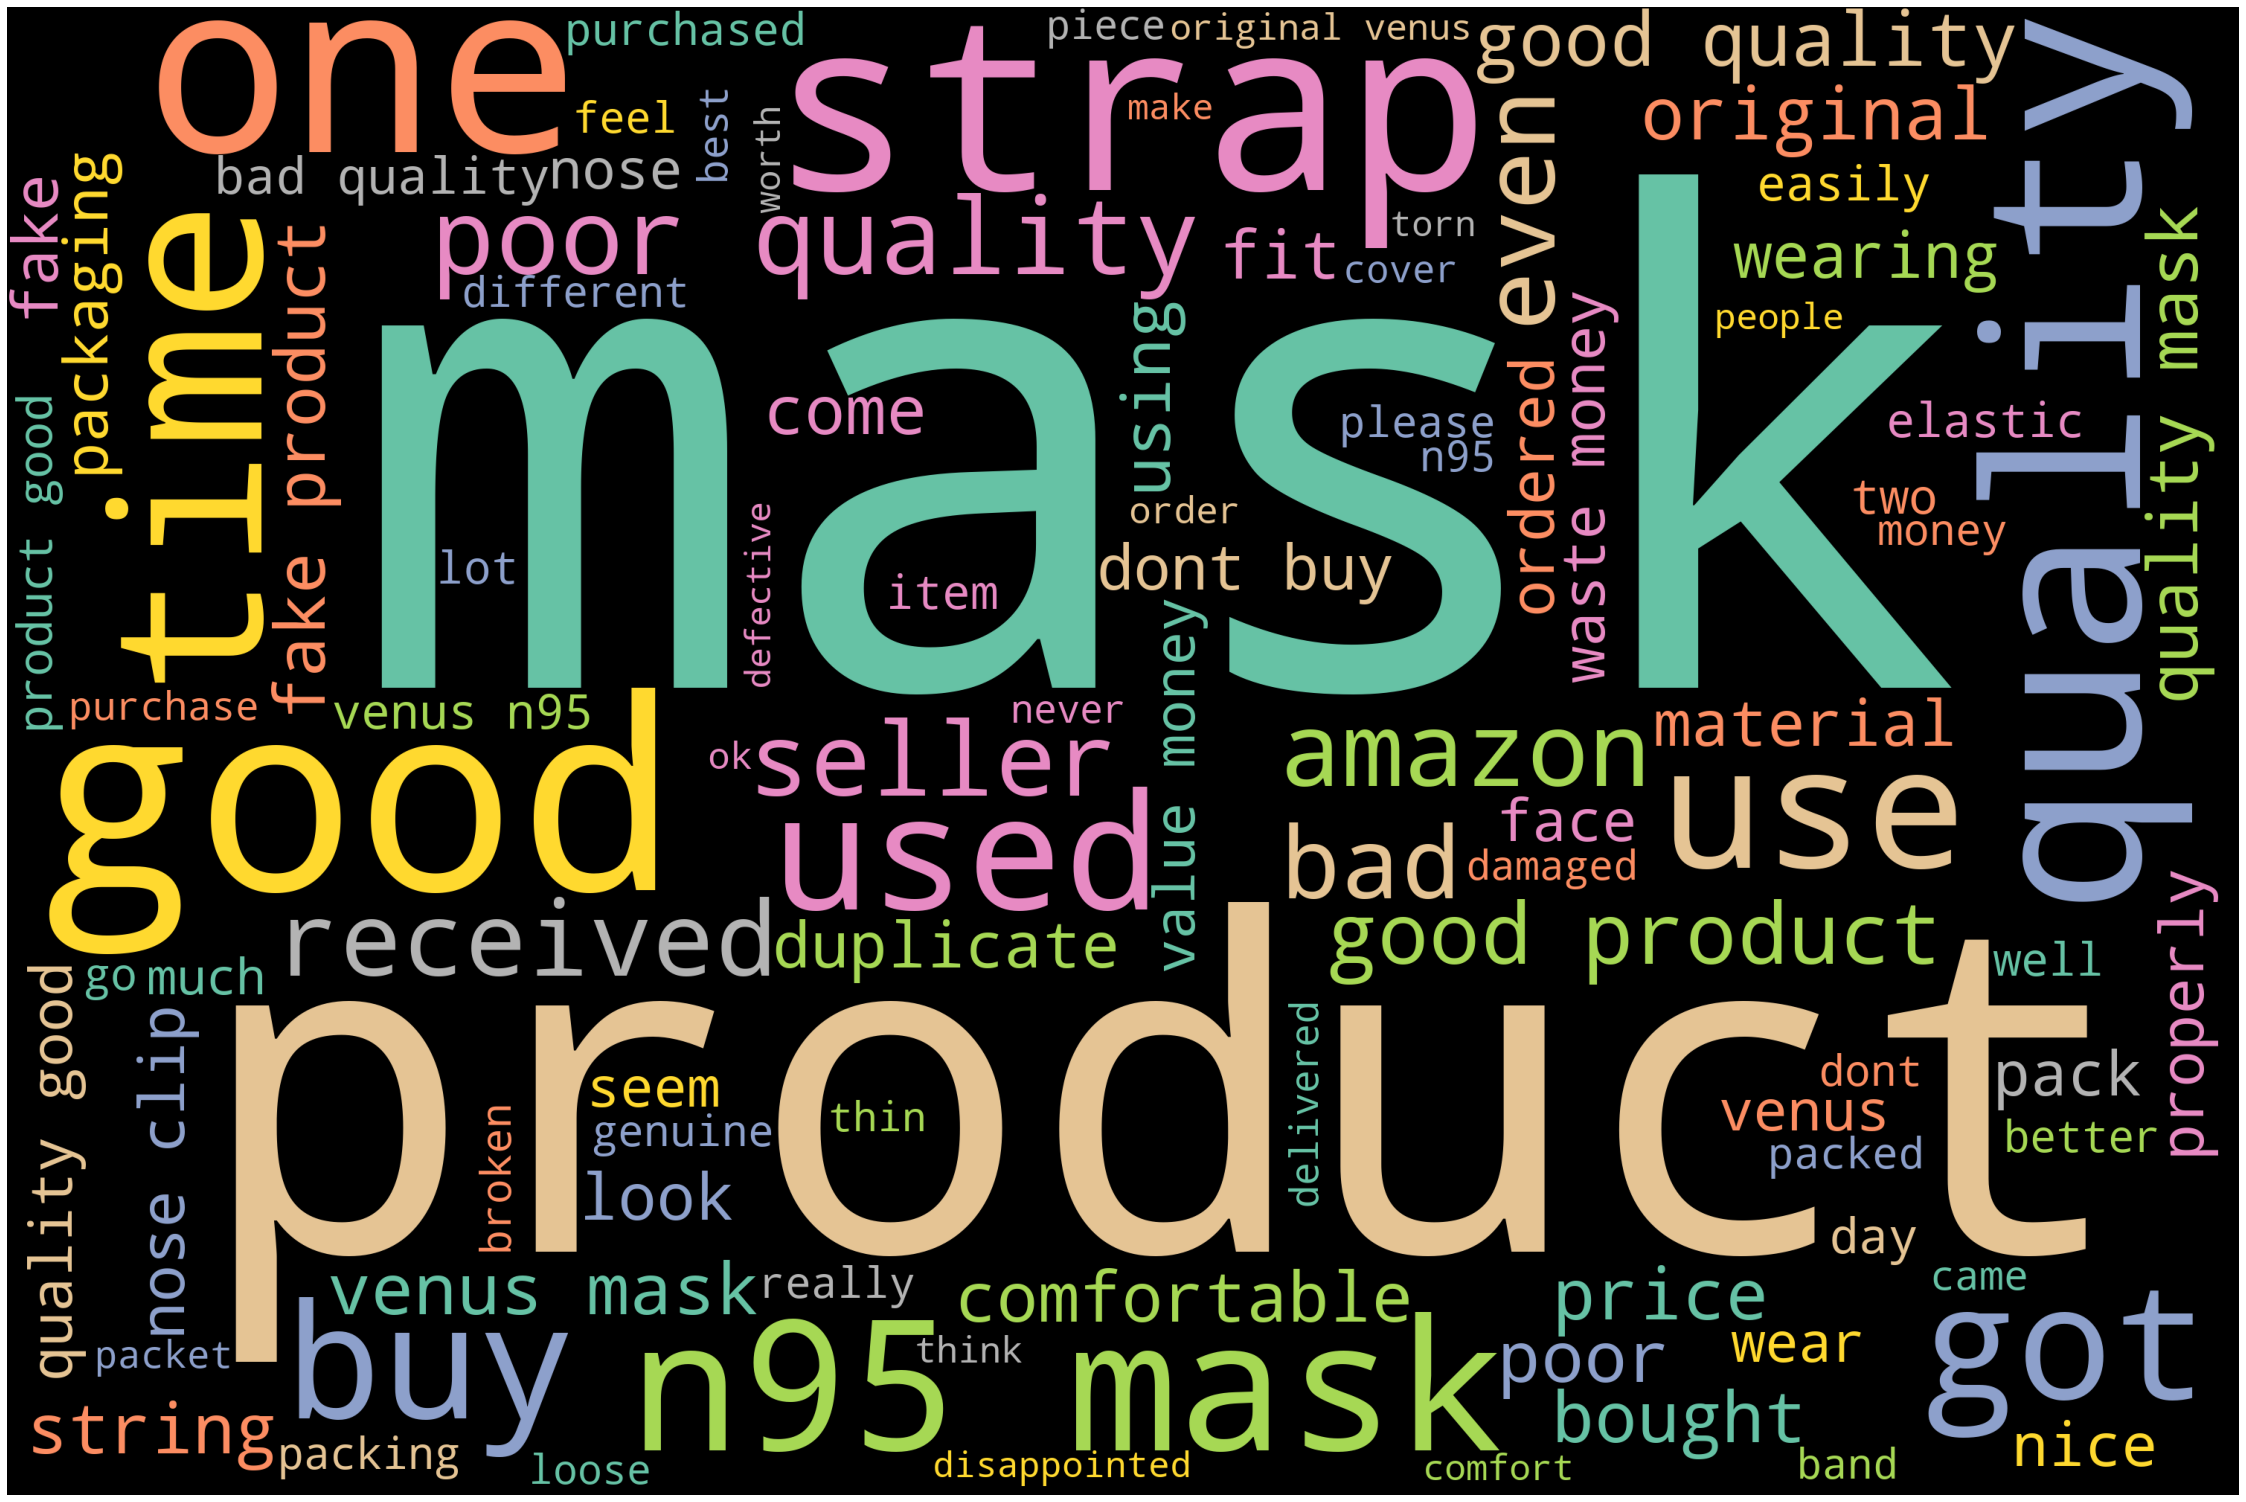

In [ ]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(review_str)
plot_cloud(wordcloud)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(no_stop_tokens)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,mask,921
1,product,766
2,quality,715
3,good,655
4,masks,577
5,venus,332
6,n95,308
7,one,280
8,original,219
9,buy,213


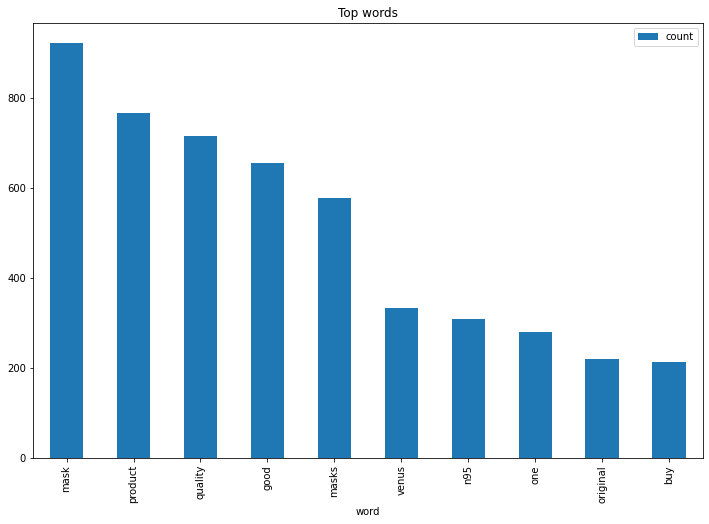

In [ ]:
##Visualizing results
#Barchart for top 10 words
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top words')

##Emotion mining

In [ ]:
afinn=pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


Negative values indicate Negative Sentiment and positive values indicate positive Sentiments.

In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
reviews_df['sentiment_value'] = reviews_df['Cleaned_reviews'].apply(calculate_sentiment)

In [ ]:
reviews_df.sort_values(by='sentiment_value').tail(5)

,reviews,Cleaned_reviews,sentiment_value
1295,\n\n Amazing MASK.. good comfort... Worth buying.. I am a doctor at Govt hospital Goa.. find the mask amazing to use on duties\n\n,amazing mask good comfort worth buying i am a doctor at govt hospital goa find the mask amazing to use on duties,15
120,"\n\n THE VENUS mask i received good condition ,it is perfect and fine ,I AM REALLY first afraid how will it be but after i seen mask it is perfect , the fitting over head loop method is fine, i trust this is good one.\n\n",the venus mask i received good condition it is perfect and fine i am really first afraid how will it be but after i seen mask it is perfect the fitting over head loop method is fine i trust this is good one,15
1285,\n\n Amazing MASK.. good comfort... Worth buying.. I am a doctor at Govt hospital Goa.. find the mask amazing to use on duties\n\n,amazing mask good comfort worth buying i am a doctor at govt hospital goa find the mask amazing to use on duties,15
1834,\n\n Wow.!! Simply awesome mask... Fits perfectly.. no hesitation for breathing.. quality of material is also very nice.. side strip also very soft. No pain in ear while wearing... Thank you seller and amazon for providing such amazing and good quality of mask... Very useful...\n\n,wow simply awesome mask fits perfectly no hesitation for breathing quality of material is also very nice side strip also very soft no pain in ear while wearing thank you seller and amazon for providing such amazing and good quality of mask very useful,22
1844,\n\n Wow.!! Simply awesome mask... Fits perfectly.. no hesitation for breathing.. quality of material is also very nice.. side strip also very soft. No pain in ear while wearing... Thank you seller and amazon for providing such amazing and good quality of mask... Very useful...\n\n,wow simply awesome mask fits perfectly no hesitation for breathing quality of material is also very nice side strip also very soft no pain in ear while wearing thank you seller and amazon for providing such amazing and good quality of mask very useful,22


In [ ]:
# Sentiment score of the whole review
reviews_df['sentiment_value'].describe()

count    2273.000000
mean        0.588209
std         3.785313
min       -60.000000
25%        -2.000000
50%         0.000000
75%         3.000000
max        22.000000
Name: sentiment_value, dtype: float64

Minimum score is -60 which is the most negative review. 50% of our data has negative review.

In [ ]:
#Let us take a look at the most negative review
reviews_df[reviews_df['sentiment_value']==-60]

,reviews,Cleaned_reviews,sentiment_value
1120,\n\n FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE\n\n,fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake,-60


Wow!!! Now I see the reason behind the highest score :p 

In [ ]:
reviews_df.sort_values(by='sentiment_value').head(3)

,reviews,Cleaned_reviews,sentiment_value,Sentiment,Subjectivity,index
1120,\n\n FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE FAKE\n\n,fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake fake,-60,Negative,1.000,1120
846,"\n\n Fake mask, very poor fit, low quality tieBEWARE !!!FAKE FAKE FAKE !!! WASTE OF MONEY\n\n",fake mask very poor fit low quality tiebeware fake fake fake waste of money,-14,Negative,0.685,846
836,"\n\n Fake mask, very poor fit, low quality tieBEWARE !!!FAKE FAKE FAKE !!! WASTE OF MONEY\n\n",fake mask very poor fit low quality tiebeware fake fake fake waste of money,-14,Negative,0.685,836


There is one outlier in our dataset. Let us remove it as it will hamper in viewing the data and analysis.

In [ ]:
reviews_df=reviews_df.drop(reviews_df.index[1120])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


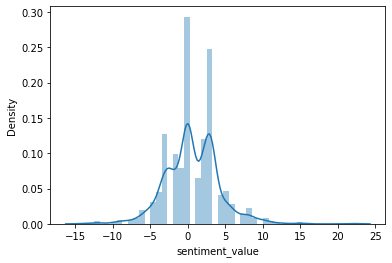

In [ ]:
import seaborn as sns
sns.distplot(reviews_df['sentiment_value'])

We can see that our reviews are more eaqually positive and negative. In order to get the number of positive and negative reviews, we have to classify them based on their sentiment.

In [ ]:
# Let's classify these tweets based on their sentiment(polarity)
def sentiment(score):
    result = ''
    if score > 0:
        result = 'Positive'
    elif score == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result

reviews_df['Sentiment'] = reviews_df.sentiment_value.apply(sentiment)

In [ ]:
reviews_df.head()

,reviews,Cleaned_reviews,sentiment_value,Sentiment,Subjectivity,index
0,\n\n The product supplied by the seller is a duplicate product.The packaging itself is bad. Most of the packs were not sealed properly - looks like heat sealed ones from kirana shop. The product quality was also flimsy. The perforations on the edge is also not uniform. I had an original one sam...,the product supplied by the seller is a duplicate productthe packaging itself is bad most of the packs were not sealed properly looks like heat sealed ones from kirana shop the product quality was also flimsy the perforations on the edge is also not uniform i had an original one same product ...,-5,Negative,0.380682,0
1,"\n\n The mask appeared used, even has one small hair, looking like moustache hair. I had been using this brand of mask for long, but this set makes me feel that few of the set may have been recycled or duplicate, for the lot no is printed separately, unlike the previous ones.\n\n",the mask appeared used even has one small hair looking like moustache hair i had been using this brand of mask for long but this set makes me feel that few of the set may have been recycled or duplicate for the lot no is printed separately unlike the previous ones,1,Positive,0.266667,1
2,\n\n The product is pathetic and people should be aware of the seriousness of putting these masks on sale. The product is absolute nonsense and not sure if this is a fake product or Venus has simply no control on their product quality check. The fit of masks is of prime importance for N95 effec...,the product is pathetic and people should be aware of the seriousness of putting these masks on sale the product is absolute nonsense and not sure if this is a fake product or venus has simply no control on their product quality check the fit of masks is of prime importance for n95 effectivene...,-6,Negative,0.639374,2
3,"\n\n The mask is good but the strap that holds the mask does not give the impression of being reliable.It may give way immediately.As said above, the very second day the loop/ strap has detached from the mask.Some of the packs are also open thereby doubting the sanctity of hygiene.The supplier ...",the mask is good but the strap that holds the mask does not give the impression of being reliableit may give way immediatelyas said above the very second day the loop strap has detached from the masksome of the packs are also open thereby doubting the sanctity of hygienethe supplier elecrama s...,4,Positive,0.340000,3
4,"\n\n Third class quality, I think this seller is not authentic, I have purchased this venus mask from one stockist before, on the basis of that quality I have order this. This masks seems to be like duplicate. Amazon pls look into the matter and ban this seller to protect your name and fame .\n\n",third class quality i think this seller is not authentic i have purchased this venus mask from one stockist before on the basis of that quality i have order this this masks seems to be like duplicate amazon pls look into the matter and ban this seller to protect your name and fame,3,Positive,0.375000,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


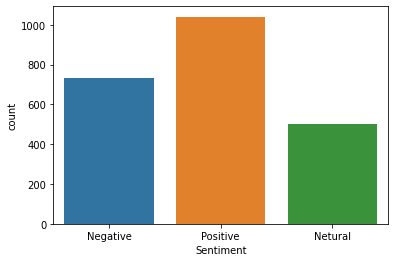

In [ ]:
sns.countplot(reviews_df['Sentiment'])
plt.show()

In [ ]:
reviews_df['Sentiment'].value_counts()

Positive    1040
Negative     732
Netural      500
Name: Sentiment, dtype: int64

Positive reviews on the mask are more than the negative ones.

Let us do the Subjectivity(personal feelings or thoughts). It values ranges from 0 to 1 where 0 is very objective and 1 is very subjective

In [ ]:
from textblob import TextBlob
def calc_sub(reviews):
  return TextBlob(reviews).sentiment.subjectivity

reviews_df['Subjectivity'] = reviews_df.Cleaned_reviews.apply(calc_sub)

In [ ]:
reviews_df.head()

,reviews,Cleaned_reviews,sentiment_value,Sentiment,Subjectivity,index
0,\n\n The product supplied by the seller is a duplicate product.The packaging itself is bad. Most of the packs were not sealed properly - looks like heat sealed ones from kirana shop. The product quality was also flimsy. The perforations on the edge is also not uniform. I had an original one sam...,the product supplied by the seller is a duplicate productthe packaging itself is bad most of the packs were not sealed properly looks like heat sealed ones from kirana shop the product quality was also flimsy the perforations on the edge is also not uniform i had an original one same product ...,-5,Negative,0.380682,0
1,"\n\n The mask appeared used, even has one small hair, looking like moustache hair. I had been using this brand of mask for long, but this set makes me feel that few of the set may have been recycled or duplicate, for the lot no is printed separately, unlike the previous ones.\n\n",the mask appeared used even has one small hair looking like moustache hair i had been using this brand of mask for long but this set makes me feel that few of the set may have been recycled or duplicate for the lot no is printed separately unlike the previous ones,1,Positive,0.266667,1
2,\n\n The product is pathetic and people should be aware of the seriousness of putting these masks on sale. The product is absolute nonsense and not sure if this is a fake product or Venus has simply no control on their product quality check. The fit of masks is of prime importance for N95 effec...,the product is pathetic and people should be aware of the seriousness of putting these masks on sale the product is absolute nonsense and not sure if this is a fake product or venus has simply no control on their product quality check the fit of masks is of prime importance for n95 effectivene...,-6,Negative,0.639374,2
3,"\n\n The mask is good but the strap that holds the mask does not give the impression of being reliable.It may give way immediately.As said above, the very second day the loop/ strap has detached from the mask.Some of the packs are also open thereby doubting the sanctity of hygiene.The supplier ...",the mask is good but the strap that holds the mask does not give the impression of being reliableit may give way immediatelyas said above the very second day the loop strap has detached from the masksome of the packs are also open thereby doubting the sanctity of hygienethe supplier elecrama s...,4,Positive,0.340000,3
4,"\n\n Third class quality, I think this seller is not authentic, I have purchased this venus mask from one stockist before, on the basis of that quality I have order this. This masks seems to be like duplicate. Amazon pls look into the matter and ban this seller to protect your name and fame .\n\n",third class quality i think this seller is not authentic i have purchased this venus mask from one stockist before on the basis of that quality i have order this this masks seems to be like duplicate amazon pls look into the matter and ban this seller to protect your name and fame,3,Positive,0.375000,4


Text(0, 0.5, 'Subjectivity')

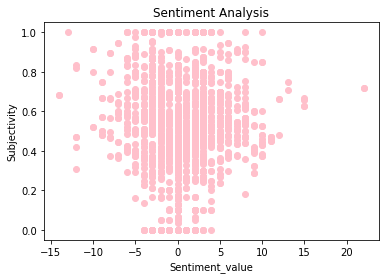

In [ ]:
plt.scatter(reviews_df.sentiment_value, reviews_df.Subjectivity, color='pink')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment_value')
plt.ylabel('Subjectivity')

There are more dots on the positive side and hence we can say that our reviews are Positive and Subjective

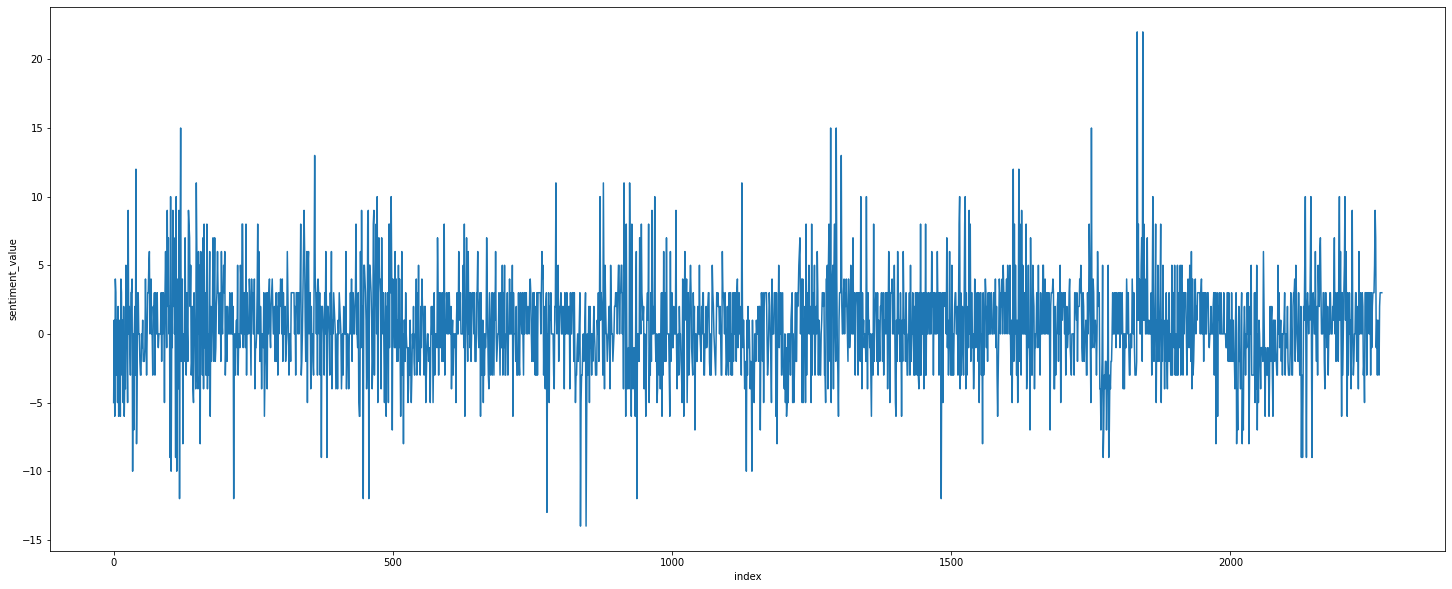

In [ ]:
reviews_df['index']=range(0,len(reviews_df))
plt.figure(figsize=(25, 10))
sns.lineplot(y='sentiment_value',x='index',data=reviews_df)

The lines are equally denser on both the sides with more outliers or peaks on the positive side.

In [ ]:
# how many words are in the sentence?
reviews_df['word_count'] = reviews_df['Cleaned_reviews'].str.split().apply(len)
reviews_df['word_count'].head(10)

0    127
1     51
2     91
3     63
4     53
5     54
6     53
7    127
8     53
9     54
Name: word_count, dtype: int64

Text(0, 0.5, 'Sentiment_value')

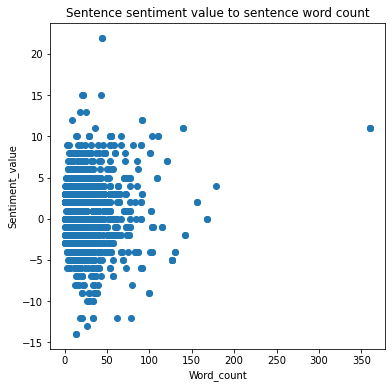

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x='word_count', y='sentiment_value',data=reviews_df)
plt.title('Sentence sentiment value to sentence word count')
plt.xlabel('Word_count')
plt.ylabel('Sentiment_value')

Most of our reviews are short having less than 50 words.

In [ ]:
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'Positive']
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'Negative']

In [ ]:
print('Positive reviews')
for i, row in positive_reviews[:5].iterrows():
  print(row['Cleaned_reviews'])

print('-------------------------------------------------------------------------')

print('Negative reviews')
for i, row in negative_reviews[:5].iterrows():
  print(row['Cleaned_reviews'])

Positive reviews
  the mask appeared used even has one small hair looking like moustache hair i had been using this brand of mask for long but this set makes me feel that few of the set may have been recycled or duplicate for the lot no is printed separately unlike the previous ones
  the mask is good but the strap that holds the mask does not give the impression of being reliableit may give way immediatelyas said above the very second day the loop strap has detached from the masksome of the packs are also open thereby doubting the sanctity of hygienethe supplier elecrama should give more importance to these factors rather than just make profits
  third class quality i think this seller is not authentic i have purchased this venus mask from one stockist before on the basis of that quality i have order this this masks seems to be like duplicate amazon pls look into the matter and ban this seller to protect your name and fame 
  the mask ordered from bajaj shri group was not even stitche

In [ ]:
len(positive_reviews)/len(negative_reviews)

1.4207650273224044

Since the number is positive, we can conclude that Venus n95 masks have got positive reviews and is a good product to buy or recommend.